# Grid Search Demo

## 載入測試乳癌資料

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## 設定SVM要尋找的hyper-parameter

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.svm import SVC
svm_parameter = [{'kernel': ['rbf','linear'],'C': [.01, 1, 10, 100, 1000, 10000], 'gamma': [.01, .1, 1, 10, 100, 1000, 10000]}]

## 製作 training/testing set

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset['data'])
x_train,x_test,y_train,y_test = train_test_split(scaled_data,dataset['target'],random_state=9527)

## 調用 GridSearch 函數

In [4]:
clf = GridSearchCV(SVC(), svm_parameter, cv=10, scoring='roc_auc', n_jobs=-1)

In [5]:
clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 1, 10, 100, 1000, 10000],
                          'gamma': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                          'kernel': ['rbf', 'linear']}],
             scoring='roc_auc')

## 顯示Search結束之後最佳的hyper-parameter組合

In [6]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [7]:
best_model=SVC(**clf.best_params_)

In [8]:
best_model.fit(x_train, y_train)

SVC(C=10, gamma=0.01)

In [9]:
default_model = SVC()
default_model.fit(x_train, y_train)

SVC()

## 比較有無調整參數的預測正確率

In [10]:
default_model.score(x_test, y_test)

0.965034965034965

In [11]:
best_model.score(x_test,y_test)

0.9790209790209791

# Pycart DEMO

## 安裝 Pycart
https://pycaret.readthedocs.io/en/latest/installation.html

In [12]:
!pip install pycaret[full]

## 載入模組 & 整理資料格式

In [13]:
import pandas as pd
import numpy as np
from pycaret.classification import *
df = pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])
df['Target'] = dataset['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [14]:
setup(data=df,target='Target',session_id=9527, silent=True)

,Description,Value
0,session_id,9527
1,Target,Target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(569, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


('Target',
 False,
      mean radius  mean texture    mean area  mean smoothness  \
 33        19.270     26.469999  1162.000000          0.09401   
 464       13.170     18.219999   537.299988          0.07466   
 273        9.742     15.670000   289.899994          0.09037   
 369       22.010     21.900000  1482.000000          0.10630   
 348       11.470     16.030001   402.700012          0.09076   
 ..           ...           ...          ...              ...   
 392       15.490     19.969999   744.700012          0.11600   
 560       14.050     27.150000   600.400024          0.09929   
 16        14.680     20.129999   684.500000          0.09867   
 136       11.710     16.670000   423.600006          0.10510   
 380       11.270     12.960000   386.299988          0.12370   
 
      mean compactness  mean concavity  mean concave points  mean symmetry  \
 33            0.17190         0.16570              0.07593         0.1853   
 464           0.05994         0.04859     

In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9749,0.9957,0.9800,0.9803,0.9800,0.9464,0.9470,20.6670
et,Extra Trees Classifier,0.9724,0.9952,0.9840,0.9732,0.9783,0.9403,0.9415,0.1220
catboost,CatBoost Classifier,0.9699,0.9955,0.9760,0.9763,0.9760,0.9357,0.9363,12.2520
gbc,Gradient Boosting Classifier,0.9674,0.9920,0.9800,0.9692,0.9743,0.9295,0.9304,0.1250
rf,Random Forest Classifier,0.9673,0.9901,0.9800,0.9703,0.9744,0.9290,0.9318,0.1550
qda,Quadratic Discriminant Analysis,0.9623,0.9943,0.9640,0.9762,0.9699,0.9195,0.9202,0.0070
lightgbm,Light Gradient Boosting Machine,0.9623,0.9944,0.9760,0.9652,0.9703,0.9187,0.9200,0.2040
lda,Linear Discriminant Analysis,0.9622,0.9976,0.9920,0.9519,0.9710,0.9169,0.9206,0.0150
ada,Ada Boost Classifier,0.9621,0.9970,0.9840,0.9603,0.9711,0.9159,0.9204,0.0590
lr,Logistic Regression,0.9599,0.9938,0.9720,0.9657,0.9680,0.9140,0.9165,0.3430


In [16]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=9527, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [17]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


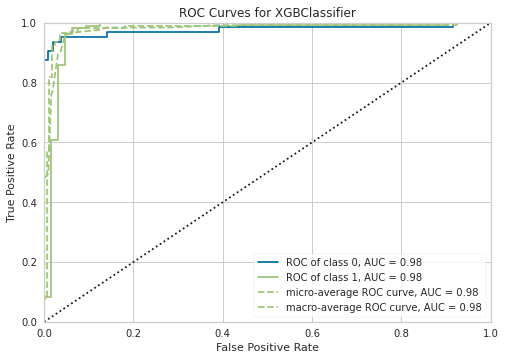

In [19]:
plot_model(best_model,plot='auc')

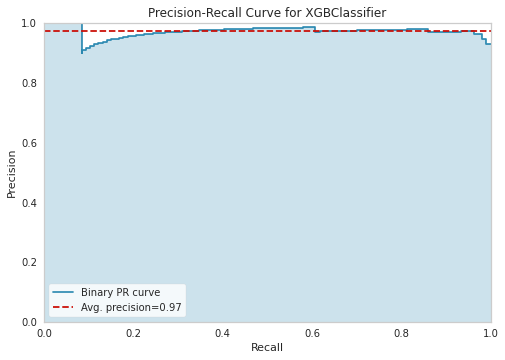

In [20]:
plot_model(best_model,plot='pr')

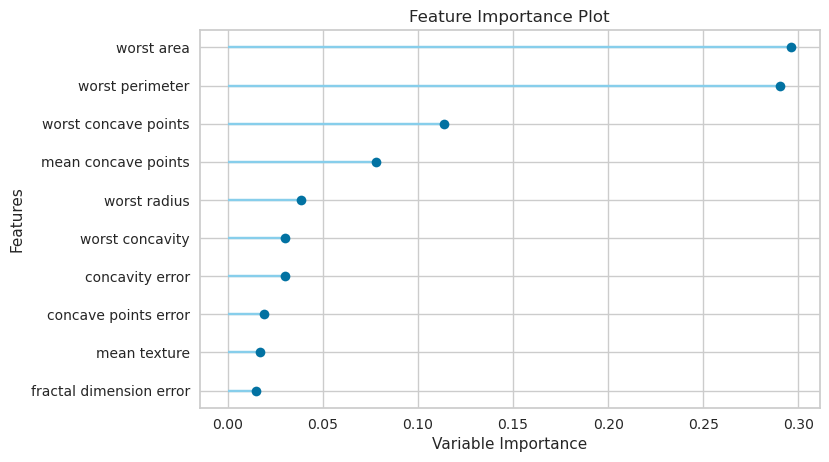

In [21]:
plot_model(best_model,plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


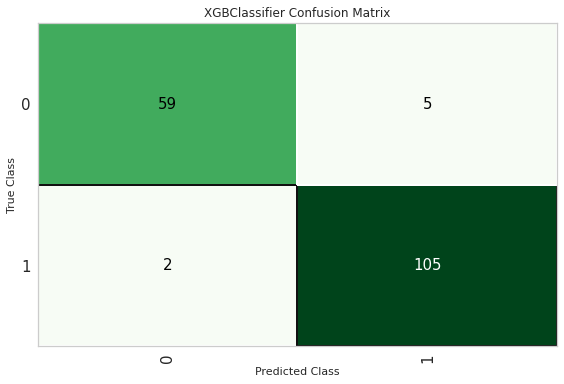

In [22]:
plot_model(best_model,plot='confusion_matrix')